# Generate some data

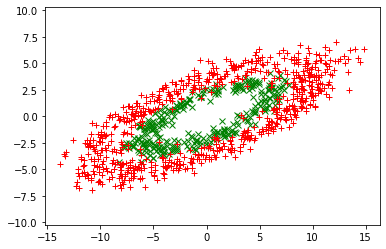

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

data_form = ''
if data_form == 'linear':
    data = np.random.randn(1000, 2)
    delta = 1 * np.array([[1, 1]])
    n = 300
    data[n:] += delta
    data[:n] -= delta
else:
    angle = np.pi * np.random.randn(1000,1)
    radius = (np.random.randn(1000,1) / 3 + 2) * 2
    n = 300
    radius[n:] *= 1.3
    radius[:n] /= 1.3
    data_x, data_y = 2 * radius * np.cos(angle), radius * np.sin(angle + np.pi/4)
    data = np.concatenate((data_x, data_y), axis=1)

labels = np.zeros(data.shape[0])
labels[n:] = 1.0

data_x, data_y = data[:,0], data[:,1]
plt.plot(data_x[labels == 0], data_y[labels == 0], 'gx')
plt.plot(data_x[labels == 1], data_y[labels == 1], 'r+')
plt.axis('equal')
plt.show()

# Perform k-nearest-neighbor classification using `sklearn`

In [2]:
from sklearn.neighbors import KNeighborsClassifier as kNN

classifier = kNN()
classifier.fit(data, labels)

KNeighborsClassifier()

# Plot decision regions

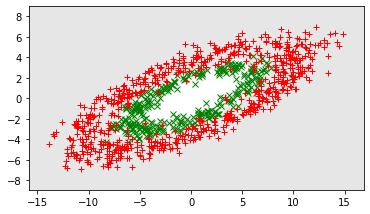

In [3]:
minX, minY = np.min(data, axis=0) - 2
maxX, maxY = np.max(data, axis=0) + 2

meshX = np.linspace(minX, maxX, 100)
meshY = np.linspace(minY, maxY, 100)
X, Y = np.meshgrid(meshX, meshY)
Z = 0 * X
for i in range(meshX.shape[0]):
    for j in range(meshY.shape[0]):
        Z[i,j] = classifier.predict([[X[i,j], Y[i,j]]])

fig = plt.imshow(Z,
           extent=[minX, maxX, minY, maxY],
           origin="lower", cmap='Greys', alpha=0.1)

plt.plot(data_x[labels == 0], data_y[labels == 0], 'gx')
plt.plot(data_x[labels == 1], data_y[labels == 1], 'r+')
plt.show()

# CHALLENGE TO STUDENT

**Challenge 1:**

Perform multi-class kNN (as opposed to binary classification).

**Challenge 2:**

Obtain a real dataset (with labels) and perform kNN.